In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 

## Linear Regression with one variable

### Problem
We will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

In [17]:
data =pd.read_csv('data.csv', header = None)
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [18]:
data.size

194

### Ploting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot to visualize the data. It has only two properties to plot (profit and population).

In [19]:
X = np.array(data.iloc[:,0]) # read first column
y = np.array(data.iloc[:,1]) # read second column

m = len(y)
print(m)

97


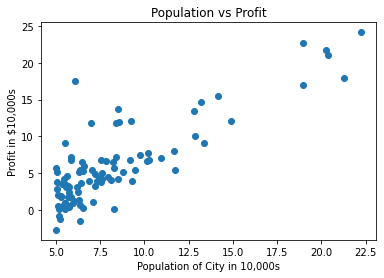

In [20]:
plt.scatter(X,y)
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Gradient Descent

In this part, we will fit the linear regression parameters θ to our dataset using gradient descent. The objective of linear regression is to minimize the cost function where the hypothesis hθ(x) is given by the linear model.

In [21]:
# adding the intercept term
ones = np.ones((m,1)) 

# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).

X = np.stack([np.ones(m), X], axis=1)


In [22]:
#Testing the cost function
def computeCost(X,y,theta):
    J = (np.sum(np.power((np.dot(X, theta) - y),2)))/(2*m)
    return J

### Computing the cost J(θ)

As we perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate J(θ) so we can check the convergence of our gradient descent implementation.

First of all lets calculate Cost. remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. Once we have completed the function, the next step is to run computeCost once using θ initialized to zeros, and we will see the cost printed to the screen.

You should expect to see a cost of 32.07

In [23]:
#compute and display initial cost
theta = np.zeros(2)
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 32.07


In [24]:
theta = np.array([-1,2])
J = computeCost(X, y, theta)
print('With theta = [-1, 2]\nCost computed = %.2f' % J)

With theta = [-1, 2]
Cost computed = 54.24


### Gradient Descent

Next calculate gradient descent. That will help us finding values for theta to reduce cost function. 

As we program, Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain from coursera machine learning by Prof. ANdrew Ng. A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step.

Assuming we have implemented gradient descent and computeCost correctly, our value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.

In [26]:
"""
Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
gradient steps with learning rate `alpha`.

Parameters
----------
X : array_like
    The input dataset of shape (m x n+1).

y : arra_like
    Value at given features. A vector of shape (m, ).

theta : array_like
    Initial values for the linear regression parameters. 
    A vector of shape (n+1, ).

alpha : float
    The learning rate.

num_iters : int
    The number of iterations for gradient descent. 

Returns
-------
theta : array_like
    The learned linear regression parameters. A vector of shape (n+1, ).

J_history : list
    A python list for the values of the cost function after each iteration.

Instructions
------------
Peform a single gradient step on the parameter vector theta.

While debugging, it can be useful to print out the values of 
the cost function (computeCost) and gradient here.
"""

'\nPerforms gradient descent to learn `theta`. Updates theta by taking `num_iters`\ngradient steps with learning rate `alpha`.\n\nParameters\n----------\nX : array_like\n    The input dataset of shape (m x n+1).\n\ny : arra_like\n    Value at given features. A vector of shape (m, ).\n\ntheta : array_like\n    Initial values for the linear regression parameters. \n    A vector of shape (n+1, ).\n\nalpha : float\n    The learning rate.\n\nnum_iters : int\n    The number of iterations for gradient descent. \n\nReturns\n-------\ntheta : array_like\n    The learned linear regression parameters. A vector of shape (n+1, ).\n\nJ_history : list\n    A python list for the values of the cost function after each iteration.\n\nInstructions\n------------\nPeform a single gradient step on the parameter vector theta.\n\nWhile debugging, it can be useful to print out the values of \nthe cost function (computeCost) and gradient here.\n'

In [27]:
def gradientDescent(X,y,theta,alpha,iterations):
    m = y.size
    J_history = np.zeros(iterations)
    
    for i in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h-y))
        J_history[i] = computeCost(X,y,theta)
    return(theta, J_history)


Running Gradient Descent ...

theta: [-3.70968912  1.17433871]


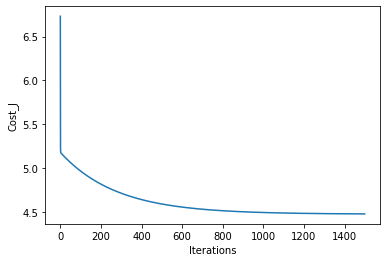

In [28]:
print('\nRunning Gradient Descent ...\n')

#Some gradient descent settings
iterations = 1500
alpha = 0.01

theta, Cost_J = gradientDescent(X, y, theta, alpha, iterations)
print('theta:', theta.ravel())

plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.show()

Now compute cost function with optimized value of theta.

In [29]:
J = computeCost(X, y, theta)
print('cost function with optimized value of theta: ',J)

cost function with optimized value of theta:  4.480124083926929


New cost function value is 4.48.. which is much better then 32.07

Lets use these final/optimized parameters to plot the linear fit.

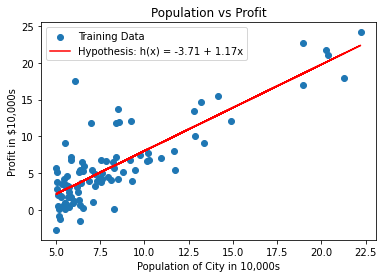

In [30]:
plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X.dot(theta),color='red',label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend(loc='best')
plt.show()


Predict profit for a city with population of 35000 and 70000 hypothesis equation hθ

In [31]:
#% Predict values for population sizes of 35,000 and 70,000

predict1 = np.dot([1, 3.5],theta) # takes inner product to get y
predict2 = np.dot([1, 7],theta) # takes inner product to get y

print('For population = 35,000, we predict a profit of ', predict1*10000)
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  4004.9636044995873
For population = 70,000, we predict a profit of  45106.818401639284
